In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Clean/rota33642.csv')
df.head()

,data_partida,tempo_viagem,dia_semana,partidaTimeStamp,qtdDiasAno,tipo_dia,turno_dia,hora_dia,Precipitacao,Temperatura,Chuva,Calor,tempo_viagem_1,tempo_viagem_2,tempo_viagem_3,tempo_viagem_4,tempo_viagem_5
0,2019-07-01 05:27:17,812,1,1561969637,182,1,2,5,0.0,18.8,0,1,787.0,781.0,781.0,801.0,703.0
1,2019-07-01 05:34:35,1081,1,1561970075,182,1,2,5,0.0,18.8,0,1,812.0,787.0,781.0,781.0,801.0
2,2019-07-01 05:44:45,827,1,1561970685,182,1,2,5,0.0,18.8,0,1,1081.0,812.0,787.0,781.0,781.0
3,2019-07-01 05:55:29,975,1,1561971329,182,1,2,5,0.0,18.8,0,1,827.0,1081.0,812.0,787.0,781.0
4,2019-07-01 06:03:26,703,1,1561971806,182,1,2,6,0.0,18.8,0,1,975.0,827.0,1081.0,812.0,787.0


In [4]:
max(df['data_partida'])

'2019-10-01 00:40:28'

In [78]:
df['tempo_viagem'].describe()

count    9309.000000
mean     1164.453754
std       240.199812
min       601.000000
25%       995.000000
50%      1144.000000
75%      1321.000000
max      2701.000000
Name: tempo_viagem, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x20322c45690>,
 'caps': [<matplotlib.lines.Line2D at 0x20322c45ae0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20322c44c40>],
 'medians': [<matplotlib.lines.Line2D at 0x20322c8b2e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20322c8ba90>],
 'means': []}

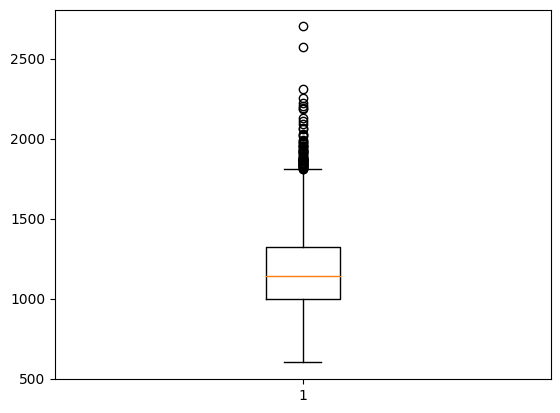

In [79]:
plt.boxplot(df['tempo_viagem'])

In [80]:
df.groupby(round((df['tempo_viagem'])/1000),0).agg({'tempo_viagem':'count'})


,tempo_viagem
tempo_viagem,
1.0,8472
2.0,835
3.0,2


In [81]:
def outlier_metric(valores):
    Q1 = np.percentile(valores,25)
    Q3 = np.percentile(valores,75)
    intervalo = Q3-Q1
    limite_superior = Q3+intervalo*1.5
    limite_inferior = Q1-intervalo*1.5
    return limite_superior,limite_inferior

In [82]:
limite_superior,limite_inferior = outlier_metric(df['tempo_viagem'])
print(limite_superior)
print(limite_inferior)

1810.0
506.0


In [83]:
df2 = df.loc[(df['tempo_viagem'] < limite_superior) & (df['tempo_viagem'] > limite_inferior)]

{'whiskers': [<matplotlib.lines.Line2D at 0x2031c9970a0>,
 'caps': [<matplotlib.lines.Line2D at 0x20322b50580>,
 'boxes': [<matplotlib.lines.Line2D at 0x2031c99b5b0>],
 'medians': [<matplotlib.lines.Line2D at 0x20322b50ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20322b50d60>],
 'means': []}

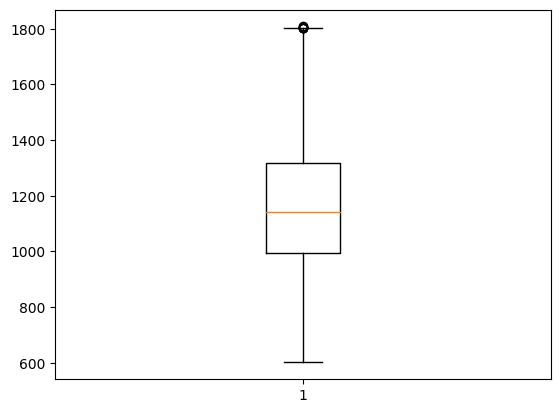

In [84]:
plt.boxplot(df2['tempo_viagem'])

In [85]:
df2.groupby(round((df2['tempo_viagem'])/1000),0).agg({'tempo_viagem':'count'})

,tempo_viagem
tempo_viagem,
1.0,8472
2.0,766


In [86]:
df2.shape[0]/df.shape[0]

0.9923729723923085